# Importing needed modules and enabling cache folder

In [1]:
import pandas as pd
import numpy as np
import fastf1
import fastf1.plotting
from fastf1.core import Laps
from timple.timedelta import strftimedelta
import matplotlib.pyplot as plt


In [2]:
fastf1.Cache.enable_cache(r'C:\Users\harsh\jupyter\f1_data_analysis\cache')

# loading the session

In [10]:
session = fastf1.get_session(2023,'bahrain','Q')
session.load()

events        ERROR 	Failed to access primary schedule backend. Falling back to Ergast! Reason: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /theOehrly/f1schedule/master/schedule_2023.json (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EA55E969A0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond')))
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
a

# getting the drivern info and their fastest laps

In [4]:
drivers = pd.unique(session.laps['Driver'])
print(drivers)

['VER' 'PER' 'LEC' 'SAI' 'ALO' 'RUS' 'HAM' 'STR' 'OCO' 'HUL' 'NOR' 'BOT'
 'ZHO' 'TSU' 'ALB' 'SAR' 'MAG' 'PIA' 'DEV' 'GAS']


In [5]:
list_fastest_laps = []
for drv in drivers:
    temp = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(temp)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)
fastest_laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:23:54.472000,1,0 days 00:01:29.708000,14,NaT,NaT,0 days 00:00:28.736000,0 days 00:00:38.514000,0 days 00:00:22.458000,0 days 01:22:53.500000,...,SOFT,2.0,False,6,0 days 01:22:24.764000,Red Bull Racing,VER,1,True,2023-03-04 16:07:25.761
1,0 days 01:24:00.743000,11,0 days 00:01:29.846000,14,NaT,NaT,0 days 00:00:28.723000,0 days 00:00:38.537000,0 days 00:00:22.586000,0 days 01:22:59.620000,...,SOFT,2.0,False,6,0 days 01:22:30.897000,Red Bull Racing,PER,1,True,2023-03-04 16:07:31.894
2,0 days 01:16:04.860000,16,0 days 00:01:30,16,NaT,NaT,0 days 00:00:28.825000,0 days 00:00:38.614000,0 days 00:00:22.561000,0 days 01:15:03.685000,...,SOFT,2.0,True,6,0 days 01:14:34.860000,Ferrari,LEC,1,True,2023-03-04 15:59:35.857
3,0 days 01:24:09.817000,55,0 days 00:01:30.154000,17,NaT,NaT,0 days 00:00:28.739000,0 days 00:00:38.700000,0 days 00:00:22.715000,0 days 01:23:08.402000,...,SOFT,2.0,False,6,0 days 01:22:39.663000,Ferrari,SAI,1,True,2023-03-04 16:07:40.660
4,0 days 01:19:51.112000,14,0 days 00:01:30.336000,14,NaT,NaT,0 days 00:00:28.852000,0 days 00:00:38.774000,0 days 00:00:22.710000,0 days 01:18:49.628000,...,SOFT,2.0,True,5,0 days 01:18:20.776000,Aston Martin,ALO,1,True,2023-03-04 16:03:21.773
5,0 days 01:20:19.733000,63,0 days 00:01:30.340000,14,NaT,NaT,0 days 00:00:28.911000,0 days 00:00:38.870000,0 days 00:00:22.559000,0 days 01:19:18.304000,...,SOFT,2.0,True,5,0 days 01:18:49.393000,Mercedes,RUS,1,True,2023-03-04 16:03:50.390
6,0 days 01:20:24.570000,44,0 days 00:01:30.384000,14,NaT,NaT,0 days 00:00:28.939000,0 days 00:00:38.829000,0 days 00:00:22.616000,0 days 01:19:23.125000,...,SOFT,2.0,True,5,0 days 01:18:54.186000,Mercedes,HAM,1,True,2023-03-04 16:03:55.183
7,0 days 01:23:18.444000,18,0 days 00:01:30.836000,17,NaT,NaT,0 days 00:00:29.033000,0 days 00:00:39.070000,0 days 00:00:22.733000,0 days 01:22:16.641000,...,SOFT,2.0,True,6,0 days 01:21:47.608000,Aston Martin,STR,1,True,2023-03-04 16:06:48.605
8,0 days 01:23:33.830000,31,0 days 00:01:30.984000,14,NaT,NaT,0 days 00:00:29.026000,0 days 00:00:39.104000,0 days 00:00:22.854000,0 days 01:22:31.872000,...,SOFT,2.0,False,5,0 days 01:22:02.846000,Alpine,OCO,1,True,2023-03-04 16:07:03.843
9,0 days 01:20:03.878000,27,0 days 00:01:31.055000,16,NaT,NaT,0 days 00:00:29.132000,0 days 00:00:39.069000,0 days 00:00:22.854000,0 days 01:19:01.955000,...,SOFT,2.0,True,6,0 days 01:18:32.823000,Haas F1 Team,HUL,1,True,2023-03-04 16:03:33.820


# adding lap time delta column to the table

In [6]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['lap_time_delta'] = fastest_laps['LapTime']-pole_lap['LapTime']
fastest_laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,lap_time_delta
0,0 days 01:23:54.472000,1,0 days 00:01:29.708000,14,NaT,NaT,0 days 00:00:28.736000,0 days 00:00:38.514000,0 days 00:00:22.458000,0 days 01:22:53.500000,...,2.0,False,6,0 days 01:22:24.764000,Red Bull Racing,VER,1,True,2023-03-04 16:07:25.761,0 days 00:00:00
1,0 days 01:24:00.743000,11,0 days 00:01:29.846000,14,NaT,NaT,0 days 00:00:28.723000,0 days 00:00:38.537000,0 days 00:00:22.586000,0 days 01:22:59.620000,...,2.0,False,6,0 days 01:22:30.897000,Red Bull Racing,PER,1,True,2023-03-04 16:07:31.894,0 days 00:00:00.138000
2,0 days 01:16:04.860000,16,0 days 00:01:30,16,NaT,NaT,0 days 00:00:28.825000,0 days 00:00:38.614000,0 days 00:00:22.561000,0 days 01:15:03.685000,...,2.0,True,6,0 days 01:14:34.860000,Ferrari,LEC,1,True,2023-03-04 15:59:35.857,0 days 00:00:00.292000
3,0 days 01:24:09.817000,55,0 days 00:01:30.154000,17,NaT,NaT,0 days 00:00:28.739000,0 days 00:00:38.700000,0 days 00:00:22.715000,0 days 01:23:08.402000,...,2.0,False,6,0 days 01:22:39.663000,Ferrari,SAI,1,True,2023-03-04 16:07:40.660,0 days 00:00:00.446000
4,0 days 01:19:51.112000,14,0 days 00:01:30.336000,14,NaT,NaT,0 days 00:00:28.852000,0 days 00:00:38.774000,0 days 00:00:22.710000,0 days 01:18:49.628000,...,2.0,True,5,0 days 01:18:20.776000,Aston Martin,ALO,1,True,2023-03-04 16:03:21.773,0 days 00:00:00.628000
5,0 days 01:20:19.733000,63,0 days 00:01:30.340000,14,NaT,NaT,0 days 00:00:28.911000,0 days 00:00:38.870000,0 days 00:00:22.559000,0 days 01:19:18.304000,...,2.0,True,5,0 days 01:18:49.393000,Mercedes,RUS,1,True,2023-03-04 16:03:50.390,0 days 00:00:00.632000
6,0 days 01:20:24.570000,44,0 days 00:01:30.384000,14,NaT,NaT,0 days 00:00:28.939000,0 days 00:00:38.829000,0 days 00:00:22.616000,0 days 01:19:23.125000,...,2.0,True,5,0 days 01:18:54.186000,Mercedes,HAM,1,True,2023-03-04 16:03:55.183,0 days 00:00:00.676000
7,0 days 01:23:18.444000,18,0 days 00:01:30.836000,17,NaT,NaT,0 days 00:00:29.033000,0 days 00:00:39.070000,0 days 00:00:22.733000,0 days 01:22:16.641000,...,2.0,True,6,0 days 01:21:47.608000,Aston Martin,STR,1,True,2023-03-04 16:06:48.605,0 days 00:00:01.128000
8,0 days 01:23:33.830000,31,0 days 00:01:30.984000,14,NaT,NaT,0 days 00:00:29.026000,0 days 00:00:39.104000,0 days 00:00:22.854000,0 days 01:22:31.872000,...,2.0,False,5,0 days 01:22:02.846000,Alpine,OCO,1,True,2023-03-04 16:07:03.843,0 days 00:00:01.276000
9,0 days 01:20:03.878000,27,0 days 00:01:31.055000,16,NaT,NaT,0 days 00:00:29.132000,0 days 00:00:39.069000,0 days 00:00:22.854000,0 days 01:19:01.955000,...,2.0,True,6,0 days 01:18:32.823000,Haas F1 Team,HUL,1,True,2023-03-04 16:03:33.820,0 days 00:00:01.347000


# Adding team colors column to the table
each driver will be plotted in their respective team color.

In [7]:
team_colors = []
for index,lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)
fastest_laps['team_colors']=np.array(team_colors)
fastest_laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,lap_time_delta,team_colors
0,0 days 01:23:54.472000,1,0 days 00:01:29.708000,14,NaT,NaT,0 days 00:00:28.736000,0 days 00:00:38.514000,0 days 00:00:22.458000,0 days 01:22:53.500000,...,False,6,0 days 01:22:24.764000,Red Bull Racing,VER,1,True,2023-03-04 16:07:25.761,0 days 00:00:00,#0600ef
1,0 days 01:24:00.743000,11,0 days 00:01:29.846000,14,NaT,NaT,0 days 00:00:28.723000,0 days 00:00:38.537000,0 days 00:00:22.586000,0 days 01:22:59.620000,...,False,6,0 days 01:22:30.897000,Red Bull Racing,PER,1,True,2023-03-04 16:07:31.894,0 days 00:00:00.138000,#0600ef
2,0 days 01:16:04.860000,16,0 days 00:01:30,16,NaT,NaT,0 days 00:00:28.825000,0 days 00:00:38.614000,0 days 00:00:22.561000,0 days 01:15:03.685000,...,True,6,0 days 01:14:34.860000,Ferrari,LEC,1,True,2023-03-04 15:59:35.857,0 days 00:00:00.292000,#dc0000
3,0 days 01:24:09.817000,55,0 days 00:01:30.154000,17,NaT,NaT,0 days 00:00:28.739000,0 days 00:00:38.700000,0 days 00:00:22.715000,0 days 01:23:08.402000,...,False,6,0 days 01:22:39.663000,Ferrari,SAI,1,True,2023-03-04 16:07:40.660,0 days 00:00:00.446000,#dc0000
4,0 days 01:19:51.112000,14,0 days 00:01:30.336000,14,NaT,NaT,0 days 00:00:28.852000,0 days 00:00:38.774000,0 days 00:00:22.710000,0 days 01:18:49.628000,...,True,5,0 days 01:18:20.776000,Aston Martin,ALO,1,True,2023-03-04 16:03:21.773,0 days 00:00:00.628000,#006f62
5,0 days 01:20:19.733000,63,0 days 00:01:30.340000,14,NaT,NaT,0 days 00:00:28.911000,0 days 00:00:38.870000,0 days 00:00:22.559000,0 days 01:19:18.304000,...,True,5,0 days 01:18:49.393000,Mercedes,RUS,1,True,2023-03-04 16:03:50.390,0 days 00:00:00.632000,#00d2be
6,0 days 01:20:24.570000,44,0 days 00:01:30.384000,14,NaT,NaT,0 days 00:00:28.939000,0 days 00:00:38.829000,0 days 00:00:22.616000,0 days 01:19:23.125000,...,True,5,0 days 01:18:54.186000,Mercedes,HAM,1,True,2023-03-04 16:03:55.183,0 days 00:00:00.676000,#00d2be
7,0 days 01:23:18.444000,18,0 days 00:01:30.836000,17,NaT,NaT,0 days 00:00:29.033000,0 days 00:00:39.070000,0 days 00:00:22.733000,0 days 01:22:16.641000,...,True,6,0 days 01:21:47.608000,Aston Martin,STR,1,True,2023-03-04 16:06:48.605,0 days 00:00:01.128000,#006f62
8,0 days 01:23:33.830000,31,0 days 00:01:30.984000,14,NaT,NaT,0 days 00:00:29.026000,0 days 00:00:39.104000,0 days 00:00:22.854000,0 days 01:22:31.872000,...,False,5,0 days 01:22:02.846000,Alpine,OCO,1,True,2023-03-04 16:07:03.843,0 days 00:00:01.276000,#0090ff
9,0 days 01:20:03.878000,27,0 days 00:01:31.055000,16,NaT,NaT,0 days 00:00:29.132000,0 days 00:00:39.069000,0 days 00:00:22.854000,0 days 01:19:01.955000,...,True,6,0 days 01:18:32.823000,Haas F1 Team,HUL,1,True,2023-03-04 16:03:33.820,0 days 00:00:01.347000,#ffffff


# plotting the results of the session
using horizantal bar plot we plot the lap time delta. 
We also add driver names as the label to the plot.


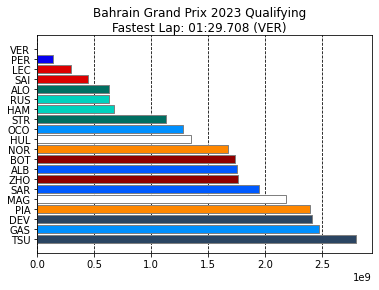

In [9]:
fig,ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['lap_time_delta'],color=fastest_laps['team_colors'],edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()